import libraries

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

load datasets

In [55]:
X_train = np.loadtxt(r"[INSET-PATH-TO-input.csv]", delimiter = ',')
Y_train = np.loadtxt(r"[INSET-PATH-TO-labels.csv]", delimiter = ',')

X_test = np.loadtxt(r"[INSET-PATH-TO-input_test.csv]", delimiter = ',')
Y_test = np.loadtxt(r"[INSET-PATH-TO-labels_test.csv]", delimiter = ',')

reshape data

In [56]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

print shape of datasets

In [61]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


display random image from training set

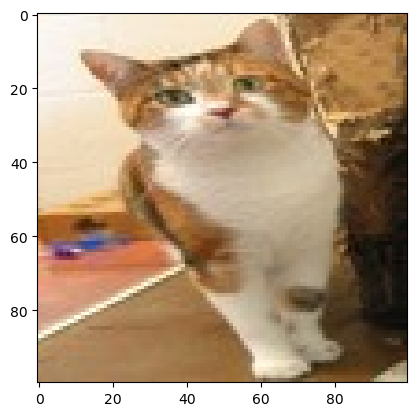

In [62]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

create model with 2 2d convolutional layers, 2 maxpooling layers, and 2 fully connected layers

In [63]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

compile the model with the binary crossentropy loss function, adam optimizer, and accuracy metric

In [64]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

fit the model with 64 batch size and 5 epochs

In [66]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8216 - loss: 0.3756
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8821 - loss: 0.3074
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8879 - loss: 0.2743
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9272 - loss: 0.1991
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9637 - loss: 0.1292


evaluate the model with test datasets

In [67]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7045 - loss: 0.7988


[1.0589224100112915, 0.6349999904632568]

test model with random images

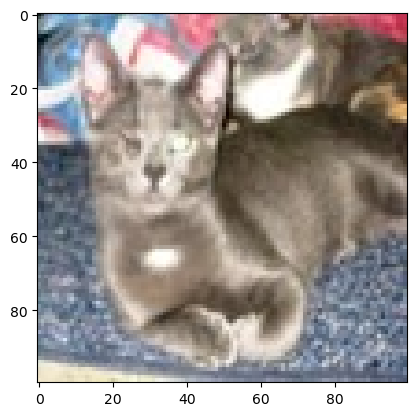

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Our model predicts that it is a cat


In [74]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print('Our model predicts that it is a', pred)